In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#from PIL import Image
#from scipy import ndimage, misc
import matplotlib.pyplot as plt
%matplotlib inline
#import skimage.io as io
#from skimage.color import rgb2gray
import cv2

In [51]:
import tensorflow as tf

In [52]:
from os.path import join
#from keras.models import Sequential
#from keras.layers import Dense, Activation,Conv2D
from sklearn.model_selection import train_test_split
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout,BatchNormalization,GlobalMaxPooling1D,MaxPooling1D,MaxPooling2D,MaxPool3D
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array

In [3]:
labels = pd.read_csv("labels.csv")
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
#find unique breed
unique_breeds = labels.breed.unique()
#get count of each breed
gr_labels = labels.groupby("breed").count()
#rename the columns of the dataframe
gr_labels = gr_labels.rename(columns = {"id" : "count"})
#sort them
gr_labels = gr_labels.sort_values("count", ascending=False)
gr_labels.head()
len(unique_breeds)

In [ ]:
#reading imanges and saving them as columns in Dataframe
bimg=[]
def getImage(id):
    
    #item =labels.iloc[0:,0][2]
    img=cv2.imread("D:/Rajat/DataScience/kaggle/DogBreed/train/"+id+".jpg",0)
    img=cv2.resize(img,(100,100))
    #img=img.reshape(1,10000)
    bimg=np.array(img)
    #print(type(bimg))
    bimg = bimg/255
    bimg = bimg.reshape(1, bimg.shape[0], bimg.shape[1],1)
    return bimg

In [ ]:
labels["ImgData"]= labels['id'].apply(getImage)

In [18]:
#convert breed from categories to numbers
dogs=labels.breed.unique()

breeds={}

num=0
for item in dogs:
    breeds[item]=num
    num+=1
    
labels.breed=[breeds[item] for item in labels.breed]

In [4]:
#creating a dataframe with full Image Path
img_paths = [join("D:/Rajat/DataScience/kaggle/DogBreed/train/", id+".jpg") for id in labels["id"]]

In [7]:
def read_and_prep_images(img_paths, img_height=100, img_width=100):
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    return img_array

In [8]:
train_data = read_and_prep_images(img_paths)

In [11]:
train_data.shape

(10222, 100, 100, 3)

In [19]:
out_y=keras.utils.to_categorical(labels["breed"])

In [141]:
img=cv2.imread(img_paths[0])
cv2.imshow('t',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#from skimage.color import rgb2gray
img1=cv2.resize(img1,(100,100))
#img_grayscale = rgb2gray(img2)
plt.imshow(img1)

# Model##

In [54]:
model=Sequential()
model.add(Conv2D(64,kernel_size=(3,3),strides=2,activation='relu',input_shape=(100,100,3)))
model.add(BatchNormalization())
model.add(Conv2D(128,kernel_size=(3,3),strides=2,activation='relu'))
model.add(Conv2D(256,kernel_size=(3,3),strides=2,activation='relu'))
model.add(Dropout(.30))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(Dropout(.50))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dropout(.30))
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128,activation='relu'))
model.add(Dropout(.30))
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128,activation='relu'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(120,activation='softmax'))

In [55]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

In [56]:
X_train, X_test, y_train, y_test = train_test_split(train_data, out_y, test_size=0.33, random_state=42)

In [57]:
H=model.fit(X_train, y_train,
          batch_size=128,
          epochs=150,
          validation_split = 0.2)

Train on 5478 samples, validate on 1370 samples
Epoch 1/150
5478/5478 [==============================] - 164s 30ms/step - loss: 4.8633 - acc: 0.0088 - val_loss: 4.7906 - val_acc: 0.0058
Epoch 2/150
5478/5478 [==============================] - 157s 29ms/step - loss: 4.8036 - acc: 0.0102 - val_loss: 4.7844 - val_acc: 0.0080
Epoch 3/150
5478/5478 [==============================] - 164s 30ms/step - loss: 4.7672 - acc: 0.0148 - val_loss: 4.7524 - val_acc: 0.0109
Epoch 4/150
5478/5478 [==============================] - 154s 28ms/step - loss: 4.7176 - acc: 0.0192 - val_loss: 4.7199 - val_acc: 0.0168
Epoch 5/150
5478/5478 [==============================] - 157s 29ms/step - loss: 4.6766 - acc: 0.0192 - val_loss: 4.7460 - val_acc: 0.0109
Epoch 6/150
5478/5478 [==============================] - 166s 30ms/step - loss: 4.6509 - acc: 0.0175 - val_loss: 4.7256 - val_acc: 0.0117
Epoch 7/150
5478/5478 [==============================] - 159s 29ms/step - loss: 4.6257 - acc: 0.0197 - val_loss: 4.7249 - va

Epoch 118/150
5478/5478 [==============================] - 151s 27ms/step - loss: 1.6960 - acc: 0.4339 - val_loss: 9.0022 - val_acc: 0.0358
Epoch 119/150
5478/5478 [==============================] - 150s 27ms/step - loss: 1.6982 - acc: 0.4304 - val_loss: 8.9325 - val_acc: 0.0285
Epoch 120/150
5478/5478 [==============================] - 150s 27ms/step - loss: 1.6537 - acc: 0.4461 - val_loss: 9.0482 - val_acc: 0.0409
Epoch 121/150
5478/5478 [==============================] - 150s 27ms/step - loss: 1.6802 - acc: 0.4388 - val_loss: 9.1909 - val_acc: 0.0314
Epoch 122/150
5478/5478 [==============================] - 151s 28ms/step - loss: 1.6543 - acc: 0.4438 - val_loss: 9.0749 - val_acc: 0.0328
Epoch 123/150
5478/5478 [==============================] - 151s 28ms/step - loss: 1.5961 - acc: 0.4571 - val_loss: 9.0089 - val_acc: 0.0365
Epoch 124/150
5478/5478 [==============================] - 150s 27ms/step - loss: 1.5900 - acc: 0.4620 - val_loss: 9.1830 - val_acc: 0.0336
Epoch 125/150
5478/5

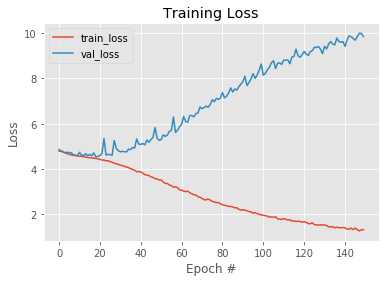

In [58]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
N = 150
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper left")


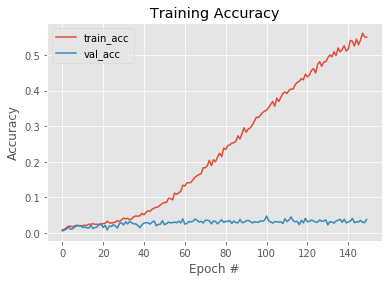

In [59]:
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="upper left")


# Recignition

In [29]:
dataX=labels['ImgData']

In [30]:
dataY=labels['breed']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.33, random_state=42)

In [34]:
from sklearn.svm import SVC

In [36]:
est=SVC()

In [ ]:
est.fit(X_train,y_train)

In [ ]:
espredict=est.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report